In [1]:
## Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Arquivos e suas respectivas origens
arquivos = {
    'AliExpress': 'data/raw_data/Meganium_Sales_Data_-_AliExpress.csv',
    'Etsy':       'data/raw_data/Meganium_Sales_Data_-_Etsy.csv',
    'Shopee':     'data/raw_data/Meganium_Sales_Data_-_Shopee.csv'
}

# Lista para armazenar os DataFrames
dataframes = []

# Carrega cada arquivo, adicionando uma coluna 'origem'
for origem, caminho in arquivos.items():
    df = pd.read_csv(caminho)
    df['origem'] = origem
    dataframes.append(df)

# Concatena todos em um único DataFrame
df = pd.concat(dataframes, ignore_index=True)

## formatar datas do formato americano (YYYY-MM-DD) para o brasileiro (DD/MM/YYYY)

df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['buyer_birth_date'] = pd.to_datetime(df['buyer_birth_date'], errors='coerce')



In [3]:


df_display = df.copy()

df_display['date'] = df_display['date'].dt.strftime('%d/%m/%Y')
df_display['buyer_birth_date'] = df_display['buyer_birth_date'].dt.strftime('%d/%m/%Y')

df_display.head(40)

,SKU,product_sold,date,quantity,unit_price,total_price,currency,site,discount_coupon,discount_value,buyer_birth_date,buyer_name,delivery_country,invoice_id,origem
0,SKU-35XX01,NEW MEGANIUM RG35XX,03/09/2024,2,90,180,GBP,AliExpress,COUPONNRpQv,52.47,20/10/1974,Timothy Flowers,Australia,a133114a-6d3b-44ac-a588-04028820762a,AliExpress
1,SKU-28XX01,NEW MEGANIUM RG28XX,16/10/2024,1,70,70,USD,AliExpress,COUPONSSJQZ,6.71,30/06/1991,Brandy King,Australia,96c63b78-fcd8-45c7-a086-001ec19f1c13,AliExpress
2,SKU-CUBEXX01,NEW MEGANIUM RG CubeXX,02/10/2024,4,80,320,USD,AliExpress,COUPONWBhjX,29.84,17/09/1976,Louis Davis,Australia,4f24b99e-5627-4478-ad5f-ed7b79cfa2a8,AliExpress
3,SKU-35XX01,NEW MEGANIUM RG35XX,10/08/2024,4,90,360,GBP,AliExpress,COUPONvRzLS,78.12,22/11/2000,Andrew Miller,UK,2d6b5daf-d8a8-4714-aa57-59bb89d589a3,AliExpress
4,SKU-40XXV01,NEW MEGANIUM RG 40XXV,18/05/2024,5,100,500,USD,AliExpress,COUPONRbjRy,46.51,22/05/1986,Andrew Moreno,Germany,a856dbb2-cb42-42fd-b071-df636493a294,AliExpress
5,SKU-CUBEXX01,NEW MEGANIUM RG CubeXX,29/09/2024,1,80,80,GBP,AliExpress,COUPONyRpkm,4.26,13/12/1986,Andrea Morton,Australia,54f3a6b2-7bfd-4c76-b44c-8bdfea36e959,AliExpress
6,SKU-28XX01,NEW MEGANIUM RG28XX,21/08/2024,4,70,280,USD,AliExpress,COUPONIbCSB,80.49,12/03/1971,Amanda Smith,Germany,804629b7-9a23-44b5-95bf-27cbabb6be72,AliExpress
7,SKU-CUBEXX01,NEW MEGANIUM RG CubeXX,11/09/2024,2,80,160,GBP,AliExpress,COUPONmRAbK,14.76,27/07/1988,Danielle Adams,Germany,48a8cc40-74b4-42a9-8cd2-99e2fe4119a7,AliExpress
8,SKU-40XXV01,NEW MEGANIUM RG 40XXV,22/09/2024,1,100,100,EUR,AliExpress,COUPONZxqyW,9.66,21/08/1978,Allison Clark,Germany,8d620c49-ca3b-4e79-8490-ef039091851a,AliExpress
9,SKU-28XX01,NEW MEGANIUM RG28XX,18/09/2024,4,70,280,GBP,AliExpress,COUPONvsBhY,42.13,03/02/1993,Eric Mcfarland,Canada,2f147605-e7f6-4c75-bd18-a6e51104c351,AliExpress


In [4]:
## Definir taxa de câmbio e converter valores para USD

# Definir taxa de câmbio fixa para converter tudo para USD
taxa_cambio = {
    "USD": 1,
    "GBP": 1.25,  # 1 GBP = 1.25 USD
    "EUR": 1.1    # 1 EUR = 1.1 USD
}

# Converter valores para USD
df["total_price_usd"] = df.apply(lambda x: x["total_price"] * taxa_cambio.get(x["currency"], 1), axis=1)
df["discount_value_usd"] = df.apply(lambda x: x["discount_value"] * taxa_cambio.get(x["currency"], 1), axis=1)


In [5]:
## Calcular receita bruta e líquida

# Calcular receita bruta e líquida em USD
df["receita_bruta"] = df["total_price_usd"]
df["receita_liquida"] = df["total_price_usd"] - df["discount_value_usd"]


In [6]:
## Produto mais vendido

produtos_mais_vendidos = df.groupby("product_sold")["quantity"].sum().sort_values(ascending=False)
print("Produtos mais vendidos:")
print(produtos_mais_vendidos.head())


Produtos mais vendidos:
product_sold
NEW MEGANIUM RG 40XXV     41
NEW MEGANIUM RG CubeXX    36
NEW MEGANIUM RG28XX       36
NEW MEGANIUM RG35XX       36
MEGANIUM RG353M           29
Name: quantity, dtype: int64


In [7]:
# Receita líquida por país

receita_pais = df.groupby("delivery_country")["receita_liquida"].sum().sort_values(ascending=False)
print("\nReceita líquida por país (em USD):")
print(receita_pais)



Receita líquida por país (em USD):
delivery_country
Canada       3725.0990
France       2949.5750
Japan        2235.6095
Australia    2042.6725
Germany      1775.6340
UK           1222.0680
USA           519.8050
Name: receita_liquida, dtype: float64


In [8]:
## Produto mais popular por país

populares_pais = df.groupby(["delivery_country", "product_sold"])["quantity"].sum().reset_index()
populares_pais = populares_pais.sort_values(["delivery_country", "quantity"], ascending=[True, False])
mais_populares = populares_pais.drop_duplicates(subset="delivery_country")
print("\nProduto mais popular por país:")
print(mais_populares[["delivery_country", "product_sold", "quantity"]])



Produto mais popular por país:
   delivery_country            product_sold  quantity
1         Australia  NEW MEGANIUM RG CubeXX        13
4            Canada   NEW MEGANIUM RG 40XXV        19
12           France     NEW MEGANIUM RG35XX        12
14          Germany   NEW MEGANIUM RG 40XXV         7
19            Japan   NEW MEGANIUM RG 40XXV        11
24               UK     NEW MEGANIUM RG35XX         7
25              USA         MEGANIUM RG353M         4


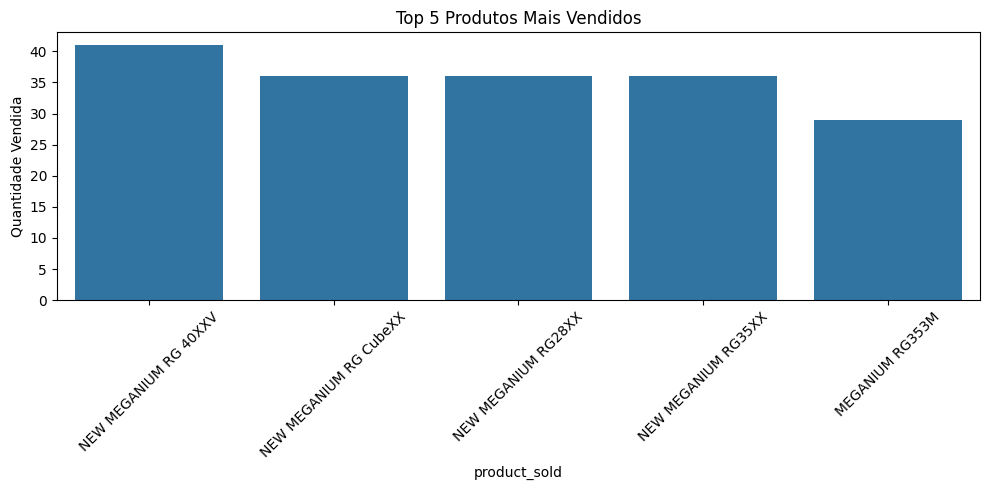

In [9]:
## Visualização dos 5 produtos mais vendidos

plt.figure(figsize=(10, 5))
sns.barplot(x=produtos_mais_vendidos.head().index, y=produtos_mais_vendidos.head().values)
plt.title("Top 5 Produtos Mais Vendidos")
plt.ylabel("Quantidade Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


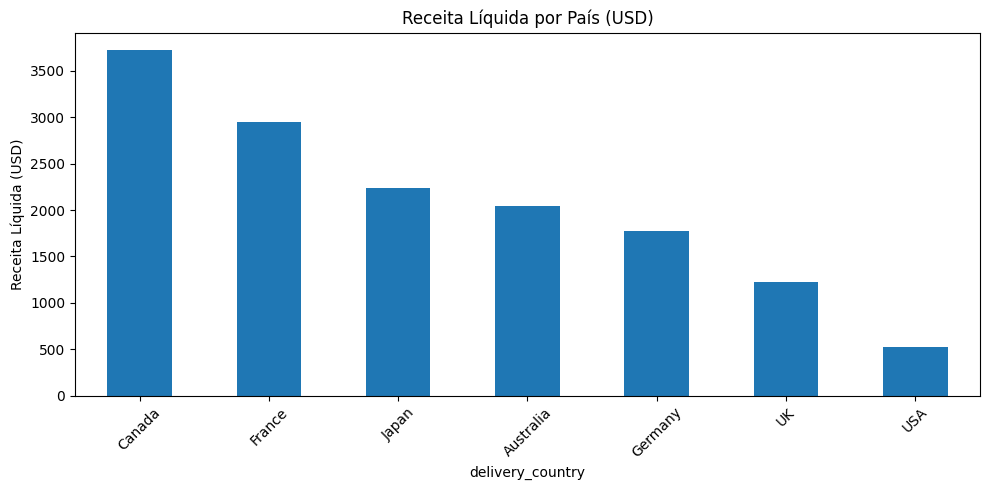

In [10]:
## Visualização da receita líquida por país

plt.figure(figsize=(10, 5))
receita_pais.plot(kind="bar", title="Receita Líquida por País (USD)")
plt.ylabel("Receita Líquida (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
## Idade média dos compradores por país

df["idade"] = 2025 - df["buyer_birth_date"].dt.year
print("\nIdade média dos compradores por país:")
print(df.groupby("delivery_country")["idade"].mean().round(1))


Idade média dos compradores por país:
delivery_country
Australia    44.9
Canada       36.6
France       44.2
Germany      44.2
Japan        44.9
UK           44.6
USA          39.3
Name: idade, dtype: float64


In [12]:
## Volume de pedidos por país

volume_por_pais = df["delivery_country"].value_counts()
print("\nVolume de pedidos por país (para logística):")
print(volume_por_pais)


Volume de pedidos por país (para logística):
delivery_country
Canada       14
France       12
Australia     9
Germany       9
Japan         8
UK            5
USA           3
Name: count, dtype: int64
